In [1]:
from alpha_vantage.timeseries import TimeSeries # Ritvik's Assignment
import pandas as pd # performing imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ScriptData(): #1st part
    def __init__(self): 
        self.data = None
        self.diction = {} # will store dataframe along with its script string in the form of dictionary so that we can access the script df via script name
    def __getitem__(self,script):
        return self.diction[script]
    def __setitem__(self,df1,script):
        self.diction[script]=df1
    def __contain__(self,script):
        if script in self.diction:
            return True
        else:
            return False
    def fetch_intraday_data(self, script):
        ts = TimeSeries(key='QS3OUNYZRWWCMQGA')
        self.data, meta_data = ts.get_intraday(script, interval = '60min') # Rectified the time interval issue
    def convert_intraday_data(self,script):
        df1 = pd.DataFrame.from_dict(self.data) #converting to dataframe and changing it according to our requirements
        df1 = df1.T
        df1.sort_index(axis=0, ascending=True,inplace = True)
        df1.reset_index(inplace=True)
        df1.rename(columns = {'index':'timestamp','1. open':'open','2. high':'high','3. low':'low','4. close':'close','5. volume':'volume'}, inplace = True)
        df1['timestamp'] = pd.to_datetime(df1['timestamp'])
        df1 = df1.astype({"open": float, "high": float, "low": float, "close": float, "volume": int})
        self.__setitem__(df1,script)    

In [3]:
script_data = ScriptData()
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-01-04 17:00:00,88.0800,88.6232,87.90,88.0200,914118
1,2023-01-04 18:00:00,88.0388,88.2257,87.97,88.1200,27522
2,2023-01-04 19:00:00,88.1100,88.1100,87.90,88.0000,125933
3,2023-01-04 20:00:00,87.9500,88.0300,87.76,87.8800,28316
4,2023-01-05 05:00:00,87.7700,88.1100,87.48,88.0200,12046
...,...,...,...,...,...,...
95,2023-01-12 16:00:00,91.3433,91.3750,90.74,91.1300,4033147
96,2023-01-12 17:00:00,91.1300,91.1700,90.93,91.0000,1168213
97,2023-01-12 18:00:00,91.0300,91.2700,91.03,91.1898,79841
98,2023-01-12 19:00:00,91.1900,91.2400,91.06,91.1900,9113


In [4]:
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')
script_data['AAPL']

,timestamp,open,high,low,close,volume
0,2023-01-04 17:00:00,126.380,126.68,126.1500,126.170,2621531
1,2023-01-04 18:00:00,126.180,127.74,126.1100,127.540,338478
2,2023-01-04 19:00:00,127.520,127.52,126.3600,127.000,160518
3,2023-01-04 20:00:00,127.010,127.08,126.6100,126.650,90243
4,2023-01-05 05:00:00,127.000,127.00,125.9500,126.400,142428
...,...,...,...,...,...,...
95,2023-01-12 16:00:00,133.355,133.56,132.7700,133.385,9061258
96,2023-01-12 17:00:00,133.380,133.45,133.1501,133.220,1565831
97,2023-01-12 18:00:00,133.200,133.50,133.1800,133.201,30665
98,2023-01-12 19:00:00,133.200,133.27,133.1300,133.200,29042


In [5]:
'GOOGL' in script_data.diction # using .diction as we are having data variable in __init__ function as well

True

In [6]:
'AAPL' in script_data.diction

True

In [7]:
'NVDA' in script_data.diction

False

In [8]:
def indicator1(df,timeperiod = 2): # 2nd part, taking the time interval for rolling average 2 by default
    df1 = pd.DataFrame(df['timestamp'])
    df1['indicator'] = df['close'].rolling(timeperiod, min_periods=timeperiod, center=False, win_type=None, on=None, axis=0).mean() # using rolling method for rolling average calc with .mean() method as well, where we set the window size as tp, minimum period required for calc also as tp
    return df1

In [9]:
indicator1(script_data['GOOGL'],timeperiod = 8) #calling the indicator fucntion, done as the image sent by you, however, for timeperiod of 8 units

,timestamp,indicator
0,2023-01-04 17:00:00,NaN
1,2023-01-04 18:00:00,NaN
2,2023-01-04 19:00:00,NaN
3,2023-01-04 20:00:00,NaN
4,2023-01-05 05:00:00,NaN
...,...,...
95,2023-01-12 16:00:00,91.233125
96,2023-01-12 17:00:00,91.103125
97,2023-01-12 18:00:00,91.215600
98,2023-01-12 19:00:00,91.246850


In [10]:
indicator1(script_data['AAPL'],5)

,timestamp,indicator
0,2023-01-04 17:00:00,NaN
1,2023-01-04 18:00:00,NaN
2,2023-01-04 19:00:00,NaN
3,2023-01-04 20:00:00,NaN
4,2023-01-05 05:00:00,126.75200
...,...,...
95,2023-01-12 16:00:00,133.51202
96,2023-01-12 17:00:00,133.54002
97,2023-01-12 18:00:00,133.43622
98,2023-01-12 19:00:00,133.27122


In [34]:
from intersect import intersection as intr
class Strategy: # 3rd part
    def __init__(self,script):
        self.script = script
        self.df1 = None
        self.df2 = None
        self.Signal = None
    def get_script_data(self,tp):
        Script = ScriptData() # using script class for fetching df
        Script.fetch_intraday_data(self.script) 
        Script.convert_intraday_data(self.script)
        self.df1 = Script[self.script]
        self.df2 = indicator1(Script[self.script],tp) # for indicator dataframe
        self.df1.rename(columns = {'close':'close_data'}, inplace=True)
        self.df2.rename(columns = {'indicator':'indicator_data'}, inplace=True)
    def get_plot(self):
        x1 = self.df1['close_data']
        x2 = self.df2['indicator_data']
        y = self.df1['timestamp']
        fig = plt.figure()
        plt.plot(y, x1, label = "close")
        plt.plot(y, x2, label = "indicator")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
    def no_int(self):
        x1 = self.df1['close_data']
        x2 = self.df2['indicator_data']
        y = (self.df1['timestamp'] - self.df1['timestamp'].min())  / np.timedelta64(1,'D')
        inter = len(sum(intr(x1, y, x2, y)))
        return inter
    def get_signals(self):
        self.Signal = pd.DataFrame(self.df1['timestamp']) # making timestamp dataframe
        self.df2 = self.df2.fillna(0) 
        sign=self.df2['indicator_data'][0]-self.df1['close_data'][0] # using sign to find initial magnitude between indicator data and close data
        sig = [] # list to store signal
        cutting = False # bool to check if both curve cutting or not as compared to initial magnitude
        for y,x in zip(self.df1['close_data'],self.df2['indicator_data']):
            if((x-y)*sign>=0): # for initial condition
                if cutting == True: # if previously cutting (downward cut for sign +ve)
                    sig.append('BUY')
                    cutting = False
                else: 
                    sig.append('NO_SIGNAL')
            elif((x-y)*sign<0): # if cutting observed as compared to inital condition
                if cutting == False:
                    sig.append('SELL')
                    cutting = True
                else: # also added this else condtion was'nt previously there for checking if its cutting and no change in sign it should add No Signal only
                    sig.append('NO_SIGNAL')
        self.Signal['signal'] = sig
        self.Signal.drop(self.Signal[self.Signal['signal']=='NO_SIGNAL'].index, inplace = True) # creating and manipulating signal df
        self.Signal.reset_index(inplace=True)
        self.Signal.drop(['index'],axis=1,inplace=True)
        return self.Signal

In [35]:
strategy = Strategy('NVDA') # initialising the object of the calss with NVDA as the script

In [36]:
strategy.get_script_data(tp=3) # gathering the intraday data, convert into a DF and then gathering the indicator data
# also passing the timeperiod for the indicator data

In [37]:
strategy.df1 # checking for the intraday data for the script converted into a DF

,timestamp,open,high,low,close_data,volume
0,2023-01-04 17:00:00,147.4900,147.9900,147.2854,147.40,575075
1,2023-01-04 18:00:00,147.4500,147.8800,147.4000,147.71,25632
2,2023-01-04 19:00:00,147.5700,147.5700,147.3900,147.47,17964
3,2023-01-04 20:00:00,147.4700,147.6900,147.3000,147.59,25911
4,2023-01-05 05:00:00,146.4600,147.1700,146.4000,146.85,4132
...,...,...,...,...,...,...
95,2023-01-12 16:00:00,165.5300,165.6029,163.7600,165.11,7429198
96,2023-01-12 17:00:00,165.1100,165.1500,164.5000,164.50,738578
97,2023-01-12 18:00:00,164.5510,165.1100,164.5100,164.70,46207
98,2023-01-12 19:00:00,164.6701,164.7400,164.6000,164.68,20878


In [38]:
strategy.df2 # checking the indicator dataframe via df2 as indicator data defined as df2 in my class

,timestamp,indicator_data
0,2023-01-04 17:00:00,NaN
1,2023-01-04 18:00:00,NaN
2,2023-01-04 19:00:00,147.526667
3,2023-01-04 20:00:00,147.590000
4,2023-01-05 05:00:00,147.303333
...,...,...
95,2023-01-12 16:00:00,165.493500
96,2023-01-12 17:00:00,165.046667
97,2023-01-12 18:00:00,164.770000
98,2023-01-12 19:00:00,164.626667


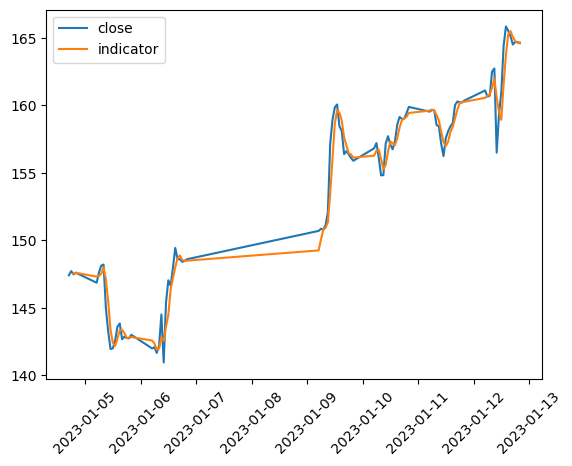

In [39]:
strategy.get_plot() # plot between timestamp and close/indicator line

In [40]:
strategy.no_int() #defined another function in class strategy to determine the number of intersection between two curves using intersection library

34

In [41]:
strategy.get_signals() # getting more signal data/records as we can see the close and indicator data values are close enough, also the number of intersections matches the number of rows in the given data.

,timestamp,signal
0,2023-01-04 19:00:00,SELL
1,2023-01-04 20:00:00,BUY
2,2023-01-05 05:00:00,SELL
3,2023-01-05 06:00:00,BUY
4,2023-01-05 09:00:00,SELL
5,2023-01-05 13:00:00,BUY
6,2023-01-05 16:00:00,SELL
7,2023-01-05 20:00:00,BUY
8,2023-01-06 05:00:00,SELL
9,2023-01-06 08:00:00,BUY


In [19]:
# repeating the same for GOOGL script
strategy = Strategy('GOOGL')
strategy.get_script_data(tp=4)# here changing the timeperiod
strategy.df1

,timestamp,open,high,low,close_data,volume
0,2023-01-04 17:00:00,88.0800,88.6232,87.90,88.0200,914118
1,2023-01-04 18:00:00,88.0388,88.2257,87.97,88.1200,27522
2,2023-01-04 19:00:00,88.1100,88.1100,87.90,88.0000,125933
3,2023-01-04 20:00:00,87.9500,88.0300,87.76,87.8800,28316
4,2023-01-05 05:00:00,87.7700,88.1100,87.48,88.0200,12046
...,...,...,...,...,...,...
95,2023-01-12 16:00:00,91.3433,91.3750,90.74,91.1300,4033147
96,2023-01-12 17:00:00,91.1300,91.1700,90.93,91.0000,1168213
97,2023-01-12 18:00:00,91.0300,91.2700,91.03,91.1898,79841
98,2023-01-12 19:00:00,91.1900,91.2400,91.06,91.1900,9113


In [20]:
strategy.df2

,timestamp,indicator_data
0,2023-01-04 17:00:00,NaN
1,2023-01-04 18:00:00,NaN
2,2023-01-04 19:00:00,NaN
3,2023-01-04 20:00:00,88.00500
4,2023-01-05 05:00:00,88.00500
...,...,...
95,2023-01-12 16:00:00,91.34625
96,2023-01-12 17:00:00,91.25375
97,2023-01-12 18:00:00,91.16495
98,2023-01-12 19:00:00,91.12745


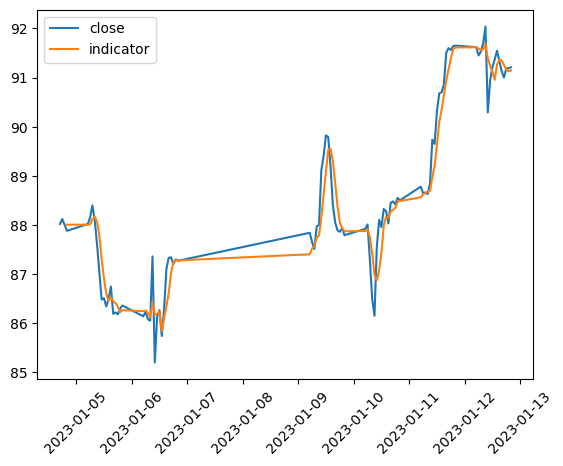

In [21]:
strategy.get_plot()

In [22]:
strategy.no_int()

33

In [23]:
strategy.get_signals()

,timestamp,signal
0,2023-01-04 20:00:00,SELL
1,2023-01-05 05:00:00,BUY
2,2023-01-05 08:00:00,SELL
3,2023-01-05 14:00:00,BUY
4,2023-01-05 16:00:00,SELL
5,2023-01-05 19:00:00,BUY
6,2023-01-06 05:00:00,SELL
7,2023-01-06 09:00:00,BUY
8,2023-01-06 10:00:00,SELL
9,2023-01-06 12:00:00,BUY


In [ ]:
import plotly.graph_objects as go # task 4 performed using plotly module 
df01 = script_data['AAPL']
df02 = indicator1(script_data['AAPL'],5)
fig = go.Figure(data = [go.Candlestick(x=df01['timestamp'],
                                      open=df01['open'],
                                      high=df01['high'],
                                      low=df01['low'],
                                      close=df01['close'])])
fig.show()